In [1]:
%matplotlib notebook

In [2]:
import matplotlib.ticker

In [42]:
frame = pd.read_csv("sampling-frame.tsv", sep = "\t")
frame.head()

,user,home_proj,global_edits,project_group,project_domain
0,! Bikkit !,dewiki,219.0,dewiki,de.wikipedia.org
1,!NewLondon31,jawiki,46.0,jawiki,ja.wikipedia.org
2,!Silent,ptwiki,20688.8,ptwiki,pt.wikipedia.org
3,"""Colorado Campeão""!",ptwiki,417.0,ptwiki,pt.wikipedia.org
4,"""quasi"" tuttologo",itwiki,117.0,itwiki,it.wikipedia.org


# Segementation

In [43]:
pd.DataFrame(frame["project_group"].value_counts())

,project_group
enwiki,18004
dewiki,3825
cee_wps,3544
jawiki,3151
frwiki,3058
commons,2599
eswiki,2426
ruwiki,2312
other,1900
zhwiki,1876


In [82]:
# Round the highest edit count up to the nearest hundred thousand,
# in order to make a pretty edge for the top bin
top_edge = int(np.ceil(frame["global_edits"].max() / 100000) * 100000)

# Evenish sized edit bins
e_edit_bins = [10, 30, 100, 300, 1000, 3000, top_edge]

# Normalish sized edit bins
n_edit_bins = [10, 30, 100, 600, 6000, 12000, top_edge]

frame["e_binned_edits"] = pd.cut(frame["global_edits"], e_edit_bins, right=False)
frame["n_binned_edits"] = pd.cut(frame["global_edits"], n_edit_bins, right=False)

In [83]:
pd.DataFrame(frame["e_binned_edits"].value_counts(sort = False))

,e_binned_edits
"[10, 30)",2792
"[30, 100)",9971
"[100, 300)",11940
"[300, 1000)",11417
"[1000, 3000)",8076
"[3000, 1100000)",8033


In [84]:
pd.DataFrame(frame["n_binned_edits"].value_counts(sort = False))

,n_binned_edits
"[10, 30)",2792
"[30, 100)",9971
"[100, 600)",18906
"[600, 6000)",16096
"[6000, 12000)",2374
"[12000, 1100000)",2090


In [85]:
frame.groupby(["project_group", "e_binned_edits"]).size().unstack()

e_binned_edits,"[10, 30)","[30, 100)","[100, 300)","[300, 1000)","[1000, 3000)","[3000, 1100000)"
project_group,,,,,,
arwiki,26,67,74,90,68,87
asia_wps,94,319,386,428,328,298
cee_wps,170,580,741,767,624,662
commons,57,224,297,468,527,1026
dewiki,141,662,881,886,693,562
enwiki,1104,4002,4543,3892,2418,2045
eswiki,166,459,607,539,365,290
frwiki,175,573,673,667,481,489
itwiki,88,383,419,395,243,238


In [86]:
frame.groupby(["project_group", "n_binned_edits"]).size().unstack()

n_binned_edits,"[10, 30)","[30, 100)","[100, 600)","[600, 6000)","[6000, 12000)","[12000, 1100000)"
project_group,,,,,,
arwiki,26,67,123,151,24,21
asia_wps,94,319,631,658,81,70
cee_wps,170,580,1196,1242,215,141
commons,57,224,561,1015,252,490
dewiki,141,662,1414,1323,178,107
enwiki,1104,4002,6998,4815,615,470
eswiki,166,459,925,737,86,53
frwiki,175,573,1060,991,153,106
itwiki,88,383,653,513,74,55


# Distribution of yearly edit counts

<IPython.core.display.Javascript object>


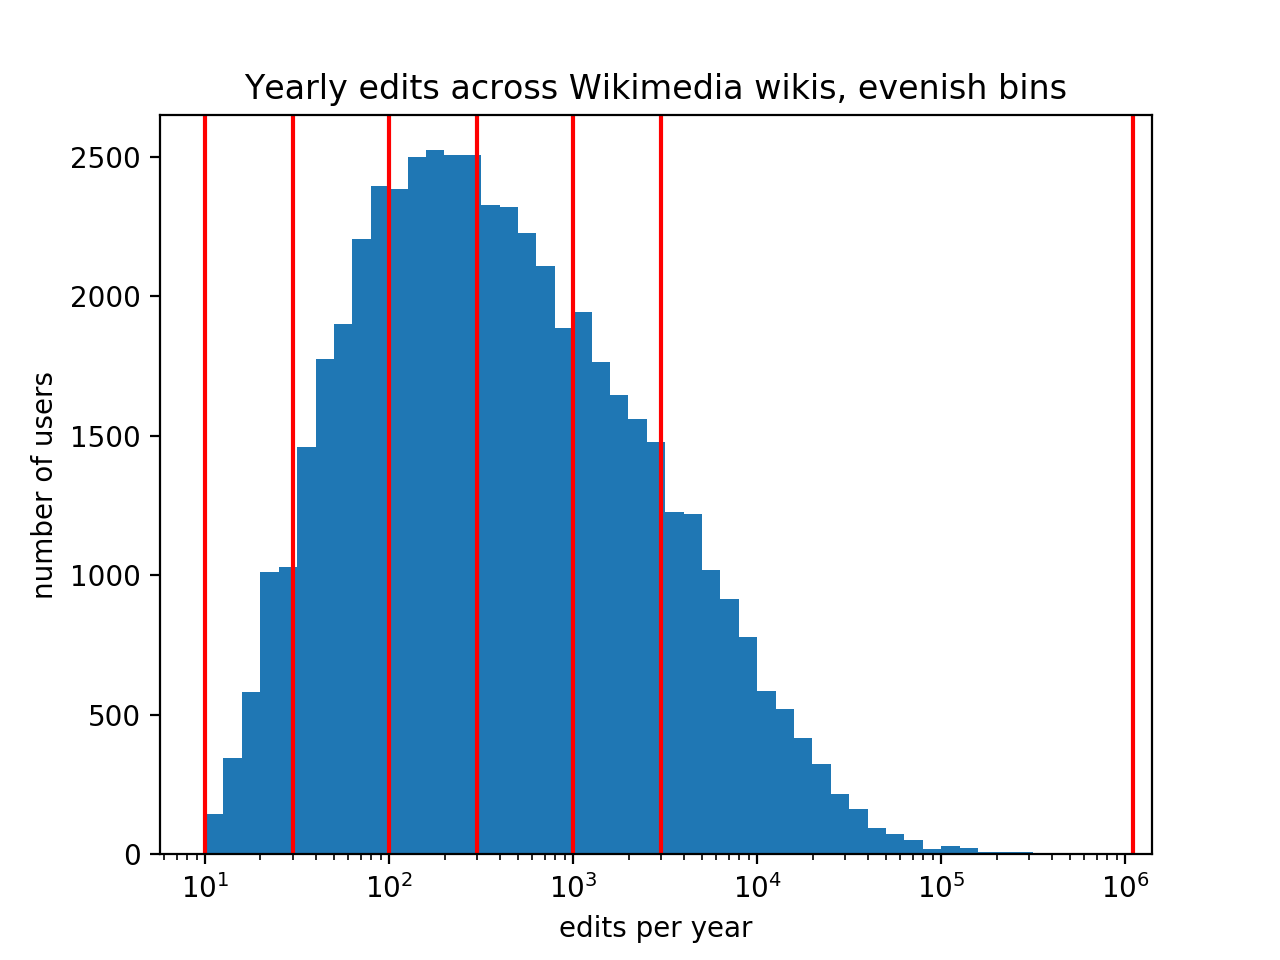

In [89]:
plt.hist(
    frame["global_edits"],
    bins = 10**np.arange(1, 6, 0.1),
)

plt.xscale("log", basex = 10)
for edge in e_edit_bins:
    plt.axvline(x=edge, color = "red")

plt.title("Yearly edits across Wikimedia wikis, evenish bins")
plt.xlabel("edits per year")
plt.ylabel("number of users")
plt.show()

<IPython.core.display.Javascript object>


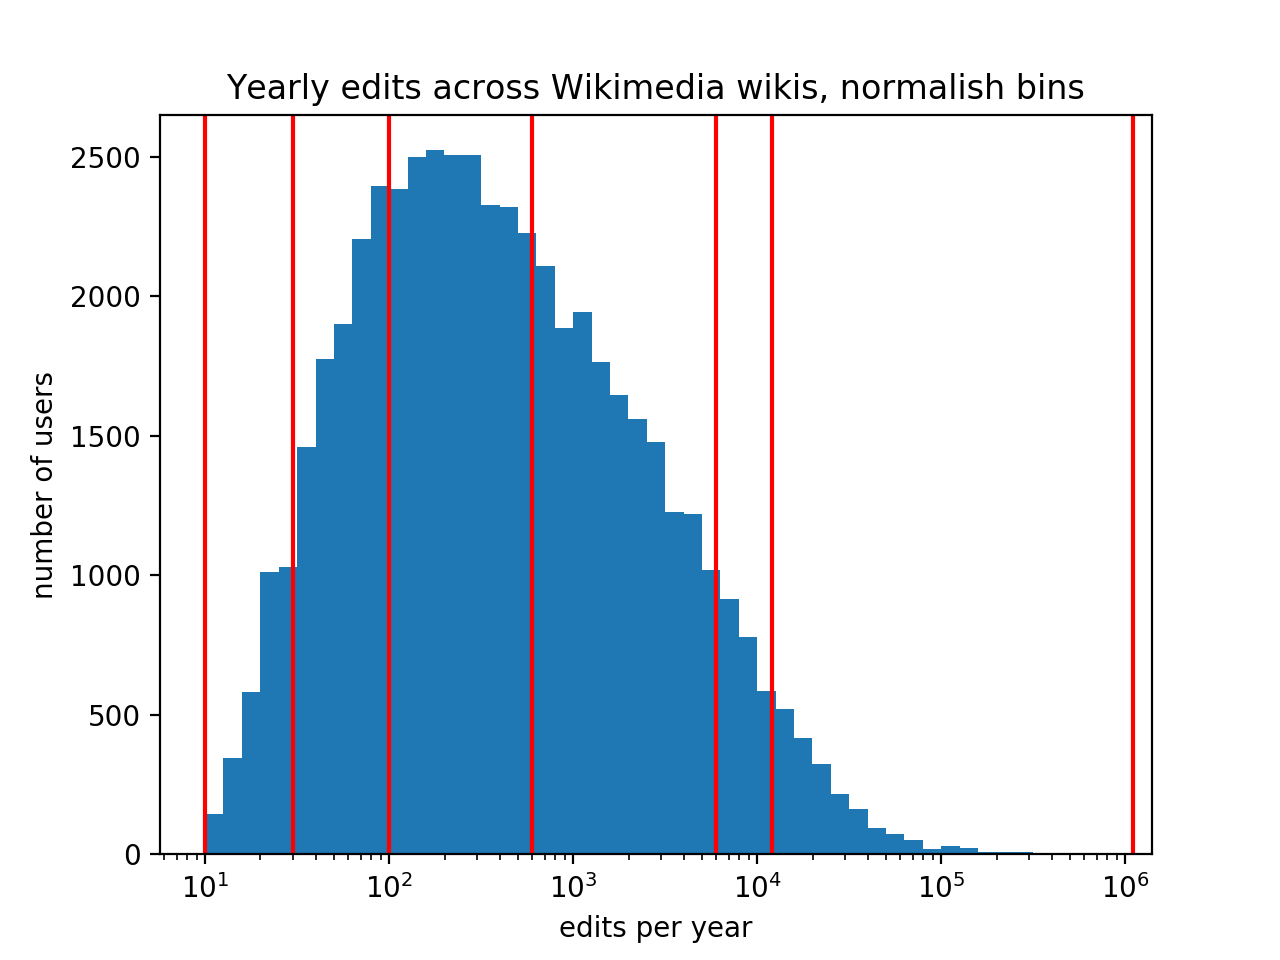

In [90]:
plt.hist(
    frame["global_edits"],
    bins = 10**np.arange(1, 6, 0.1),
)

plt.xscale("log", basex = 10)
for edge in n_edit_bins:
    plt.axvline(x=edge, color = "red")

plt.title("Yearly edits across Wikimedia wikis, normalish bins")
plt.xlabel("edits per year")
plt.ylabel("number of users")
plt.show()

## Cumulative histogram

<IPython.core.display.Javascript object>


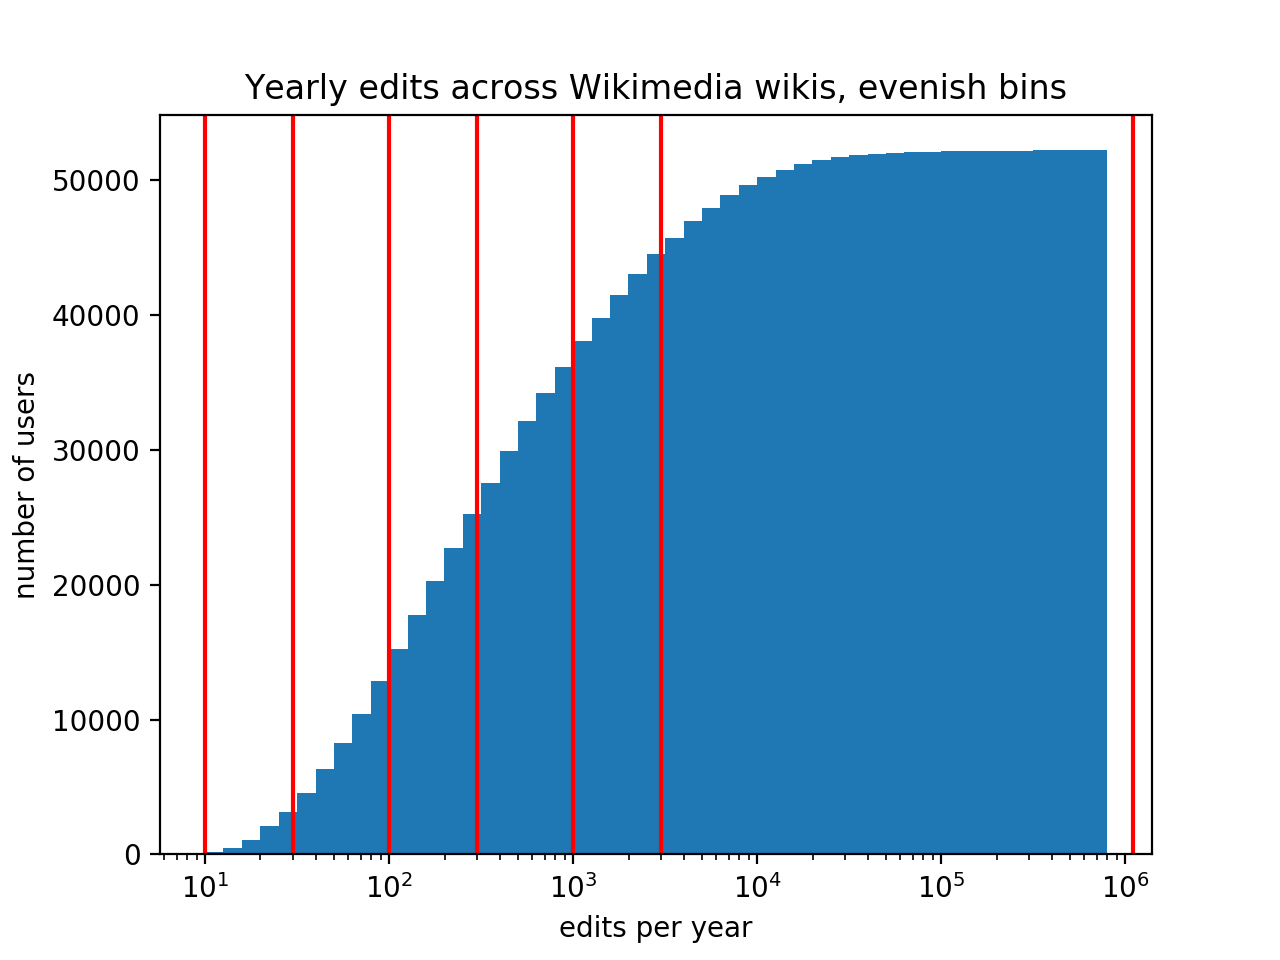

In [91]:
plt.hist(
    frame["global_edits"],
    bins = 10**np.arange(1, 6, 0.1),
    cumulative = True
)

plt.xscale("log", basex = 10)
for edge in e_edit_bins:
    plt.axvline(x=edge, color = "red")

plt.title("Yearly edits across Wikimedia wikis, evenish bins")
plt.xlabel("edits per year")
plt.ylabel("number of users")
plt.show()

<IPython.core.display.Javascript object>


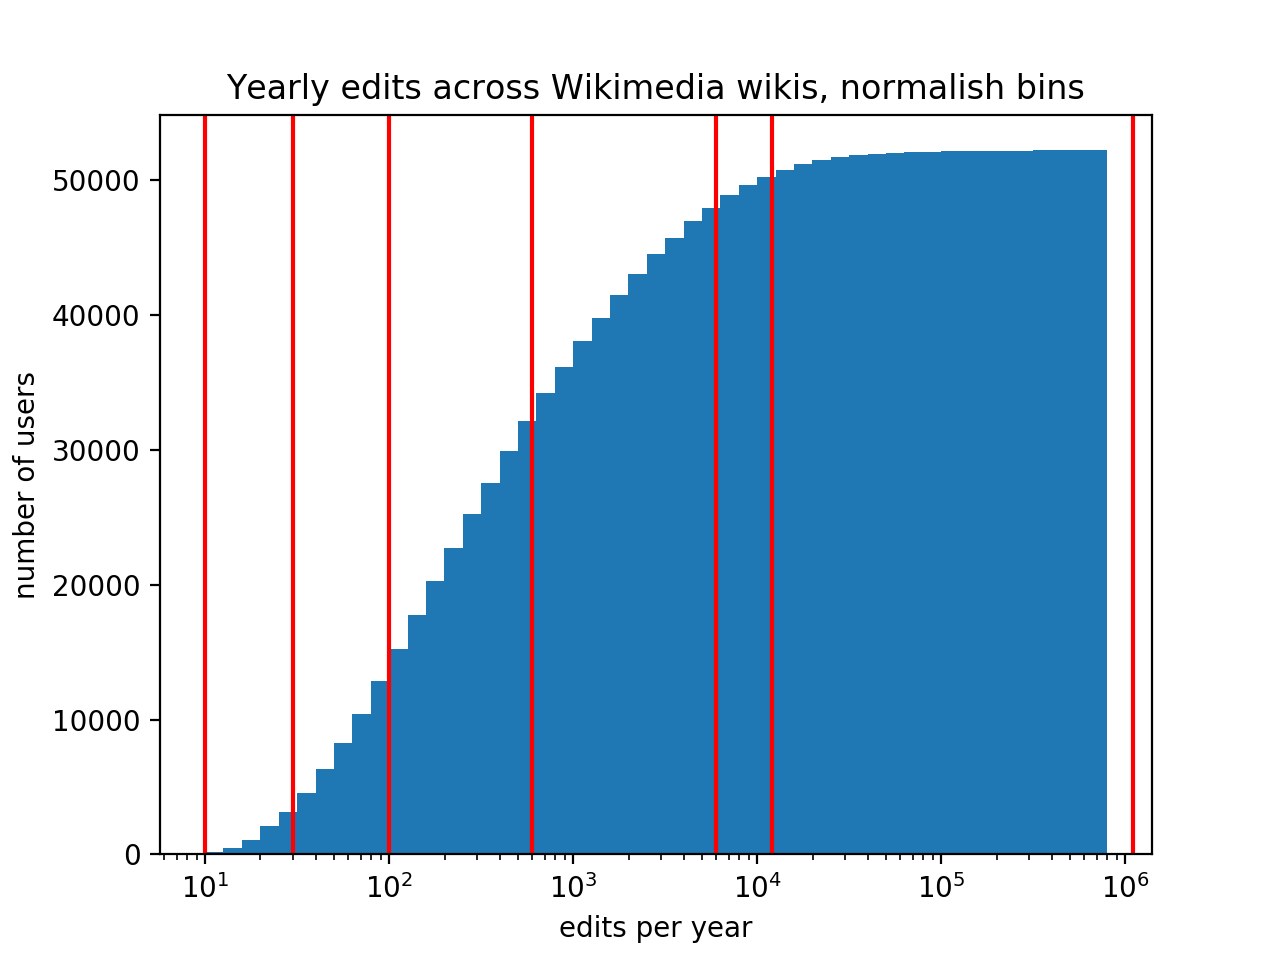

In [92]:
plt.hist(
    frame["global_edits"],
    bins = 10**np.arange(1, 6, 0.1),
    cumulative = True
)

plt.xscale("log", basex = 10)
for edge in n_edit_bins:
    plt.axvline(x=edge, color = "red")

plt.title("Yearly edits across Wikimedia wikis, normalish bins")
plt.xlabel("edits per year")
plt.ylabel("number of users")
plt.show()